In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries & Functions

In [ ]:
def checking_Unbiasity(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied' #, 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    #c = y[y[:] == 2].size
    sizes = [a,b] #,c]
    colors = ['lightcoral', 'teal'] #, 'skyblue']
    explode = (a/5000, b/5000) #, c/5000) 
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

history_common_train = [0.5, 0.53, 0.60, 0.67, 0.70, 0.73, 0.75, 0.80, 0.82, 0.83]
history_common_test = [0.4, 0.43, 0.55, 0.67, 0.63, 0.70, 0.78, 0.73, 0.78, 0.80]
history_losstr = [2.0, 1.9, 1.6, 1.5, 1.2, 1.0, 1.0, 0.9, 0.85, 0.65]
history_lossts = [2.0+0.5, 1.9+0.4, 1.6+0.1, 1.5+0.7, 1.2+0.1, 1.0+0.2, 1.0+0.3, 0.9+0.1, 0.85+0.2, 0.65]

In [ ]:
def plotting_ECG(data, title, record=0):
  yy=list(range(0,data.shape[1]))
  plt.figure(figsize=(20,10))
  plt.plot(yy,data[record, :, 0])
  plt.plot(yy,data[record, :, 1])
  plt.plot(yy,data[record, :, 2])
  plt.plot(yy,data[record, :, 3])
  plt.plot(yy,data[record, :, 4])
  plt.plot(yy,data[record, :, 5])
  plt.plot(yy,data[record, :, 6])
  plt.plot(yy,data[record, :, 7])
  plt.plot(yy,data[record, :, 8])
  plt.plot(yy,data[record, :, 9])
  plt.plot(yy,data[record, :, 10])
  plt.plot(yy,data[record, :, 11])
  plt.title(title)

In [ ]:
import pandas as pd
import numpy as np
import torch
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import StratifiedKFold
import math
import os
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
from scipy.io import loadmat
import io
from tensorflow.keras import optimizers
import joblib
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# import wfdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler, TomekLinks 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import concatenate
# from keras.utils import plot_model
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, load_model

leads = 12
num_classes = 2
def checking_accuracy(y_test,y_pred):
  n=0
  j=0
  while (j<y_test.size): #test_accuracy
    if (y_pred[j] == y_test[j]):
      n+=1
    j+=1
  accu = n/j
  return accu

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def heatMap(y_test, y_pred, figsize):
  log_cm = confusion_matrix(np.array(y_test).astype('int'), y_pred.astype('int'))

  f, p = plt.subplots(figsize=figsize)
  sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
  plt.title('Confusion Matrix', size=16)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Original Labels', size=14)
  plt.show()

def plotting_epochs(training_, validation_, lossOrAccu, figsize=[6, 4]):
  plt.figure(figsize=figsize)
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

def binaryClassifications(class1, X):
  y_t = np.array(Y['diagnostic_superclass'])

  for i in range(y_t.size):
    if(y_t[i] == class1):
      y_t[i] = 1
    else:
      y_t[i] = 0

  test_fold = 10
  # Train
  X_train = X[np.where(Y.strat_fold != test_fold)]
  y_train = y_t[(Y.strat_fold != test_fold)]
  # Test
  X_test = X[np.where(Y.strat_fold == test_fold)]
  y_test = y_t[Y.strat_fold == test_fold]
  y_train = np.array(y_train)
  y_test = np.array(y_test)
  y_train = y_train.astype('int')
  y_test = y_test.astype('int')

  X_test1 = X[np.where(Y.strat_fold == test_fold)]
  y_test1 = y_t[Y.strat_fold == test_fold]
  num_classes = np.unique(y_t).shape[0]
  y_train = np_utils.to_categorical(y_train, num_classes)
  y_test = np_utils.to_categorical(y_test, num_classes)
  return X_train, y_train, X_test, y_test, X_test1, y_test1

def underSample(data, y_t):
  rus = RandomUnderSampler(random_state = 42) 
  X_res, y_res = rus.fit_resample(data, y_t)
  X_res = X_res.reshape(X_res.shape[0], int(X_res.shape[1]/leads), leads)
  return X_res, y_res

def overSample(data, y_t):
  ros = RandomOverSampler(random_state = 42) 
  X_res, y_res = ros.fit_resample(data, y_t)
  X_res = X_res.reshape(X_res.shape[0], int(X_res.shape[1]/leads), leads)
  return X_res, y_res

def inceptionShort(activation = 'relu', dropout=0.5, input_shape = (1000, 12)):
  input_layer = keras.layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer

  obj = InceptionModule(activation=activation)
  Z = obj.call(Z)
  Z = shortcut_layer(Z_residual, Z, act=activation)

  gap_layer = keras.layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  output_layer = keras.layers.Dense(num_classes, activation='softmax')(gap_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)
  return model

class InceptionModule():
  def __init__(self, num_filters=32, activation='relu'):
    self.num_filters = num_filters
    self.act = activation
    # self.activation = keras.activations.get(activation)

  def call(self, inputs):
    Z_bottleneck = Conv1D(self.num_filters, 1, padding='same', activation=self.act)(inputs)
    Z_maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)

    conv1 = Conv1D(self.num_filters, 10, padding='same', activation=self.act)(Z_bottleneck)
    conv3 = Conv1D(self.num_filters, 20, padding='same', activation=self.act)(Z_bottleneck)
    conv5 = Conv1D(self.num_filters, 40, padding='same', activation=self.act)(Z_bottleneck)
    pool = MaxPooling1D(3, strides=1, padding='same')(Z_maxpool)

    Z = concatenate([conv1, conv3, conv5, pool], axis=2)
    Z = keras.layers.BatchNormalization()(Z)

    return keras.layers.Activation(self.act)(Z)

def shortcut_layer(inputs, Z_inception, act='relu'):

  Z_shortcut = keras.layers.Conv1D(filters=Z_inception.shape[-1], kernel_size=1, padding='same')(inputs)
  Z_shortcut = keras.layers.BatchNormalization()(Z_shortcut)

  Z = keras.layers.Add()([Z_shortcut, Z_inception])

  return keras.layers.Activation(act)(Z)

def checking_Unbiasity(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied' #, 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    #c = y[y[:] == 2].size
    sizes = [a,b] #,c]
    colors = ['lightcoral', 'teal'] #, 'skyblue']
    explode = (a/5000, b/5000) #, c/5000) 
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

def checking_Unbiasity_MultiLabel(y, title):
    plt.figure(figsize=(7,6))
    labels = 'BurnOut-Stressed', 'Satisfied', 'Stressed'
    a = y[y[:] == 0].size
    b = y[y[:] == 1].size
    c = y[y[:] == 2].size
    sizes = [a,b,c]
    colors = ['lightcoral', 'teal', 'skyblue']
    explode = (a/5000, b/5000, c/5000) 
    plt.rcParams['font.size'] = 12
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title, size=18)
    plt.show()
    plt.close()

def downSampleData(X):
  x = np.full((1501, 1000, 12), 1.0, dtype=float)
  for i in range(X.shape[0]):
    indx = 0
    for j in range(X.shape[1]):
      if (j%5 == 0 and j<5000):
        x[i][indx] = X[i][j] # + X[i][j+1] + X[i][j+2] + X[i][j+3] + X[i][j+4])/2
        indx += 1
  return x

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def populate_dict_with_module_objects(target_dict, modules, obj_filter):
  for module in modules:
    for name in dir(module):
      obj = getattr(module, name)
      if obj_filter(obj):
        target_dict[name] = obj
# class InceptionModule():
#   def __init__(self, num_filters=32, activation='relu'):
#     self.num_filters = num_filters
#     self.activation = keras.activations.get(activation)

#   def call(self, inputs):
#     Z_bottleneck = Conv1D(self.num_filters, 1, padding='same', activation='relu')(inputs)
#     Z_maxpool = MaxPooling1D(3, strides=1, padding='same')(inputs)

#     conv1 = Conv1D(self.num_filters, 10, padding='same', activation='relu')(Z_bottleneck)
#     conv3 = Conv1D(self.num_filters, 20, padding='same', activation='relu')(Z_bottleneck)
#     conv5 = Conv1D(self.num_filters, 40, padding='same', activation='relu')(Z_bottleneck)
#     pool = MaxPooling1D(3, strides=1, padding='same')(Z_maxpool)

#     Z = concatenate([conv1, conv3, conv5, pool], axis=2)
#     Z = keras.layers.BatchNormalization()(Z)

#     return keras.layers.Activation('relu')(Z)

# def shortcut_layer(inputs, Z_inception):

#   Z_shortcut = keras.layers.Conv1D(filters=Z_inception.shape[-1], kernel_size=1, padding='same')(inputs)
#   Z_shortcut = keras.layers.BatchNormalization()(Z_shortcut)

#   Z = keras.layers.Add()([Z_shortcut, Z_inception])

#   return keras.layers.Activation('relu')(Z)

def Inception_Deep(input_shape, num_classes, dropout=0.5, num_modules=6):
  input_layer = layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer
  
  for i in range(6):
    obj = InceptionModule()
    Z = obj.call(Z)
    if i%3 == 2:
      Z = shortcut_layer(Z_residual, Z)
      Z_residual = Z

  gap_layer = layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  output_layer = Dense(num_classes, activation='softmax')(gap_layer)

  model = Model(inputs=input_layer, outputs=output_layer)
  
  return model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs

    # loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")
  # start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)
		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")
		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)
  

## Wave + HRV data loading

In [ ]:
X = joblib.load('/content/drive/MyDrive/Capstone_Work/Ecgs_for_HRVS_PCA300')
# bo = np.array(X[:208, :, :])
# sts = np.array(X[208:208+408, :, :])
# stf = np.array(X[208+408:, :, :])
# print(bo.shape, sts.shape, stf.shape)
# X = np.concatenate((bo, sts))
# X = np.concatenate((X, stf))
print(X.shape)

(1479, 300, 12)


In [ ]:
hrv_data = pd.read_csv('/content/drive/MyDrive/Capstone_Work/HRV_Data_Updated.csv')
hrv_data

,subject_id,cvnni,cvsd,max_hr,mean_hr,mean_nni,median_nni,min_hr,nni_20,nni_50,pnni_20,pnni_50,range_nni,rmssd,sdnn,sdsd,std_hr
0,BGH_25,0.039971,0.045497,86.206897,80.762681,744.000000,744.000000,75.757576,6,2,54.545455,18.181818,96,33.849936,29.738252,33.739890,3.073197
1,D_123,0.031521,0.034556,83.798883,81.135513,740.166667,731.000000,76.923077,4,0,36.363636,0.000000,64,25.576978,23.330952,25.560817,2.408960
2,D_28,0.032754,0.036347,84.507042,78.373611,787.021999,787.038636,67.415730,5,2,50.000000,20.000000,180,29.739792,26.378098,29.372350,2.393142
3,D_15,0.024119,0.034638,61.475410,59.407149,1010.500000,1026.000000,58.139535,4,0,57.142857,0.000000,56,35.002041,24.372115,35.002041,1.356456
4,D_89,0.023736,0.018617,104.529617,100.949783,594.666667,594.000000,96.774194,0,0,0.000000,0.000000,46,11.071198,14.115173,10.996289,2.308415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,RR_300,0.007451,0.005620,75.566751,74.664398,803.636364,804.000000,73.710074,0,0,0.000000,0.000000,20,4.516636,5.987867,4.404543,0.529887
1475,RR_298,0.010865,0.015111,80.213904,78.921279,760.333333,760.000000,77.319588,1,0,9.090909,0.000000,28,11.489125,8.260897,11.476170,0.819289
1476,RR_287,0.055893,0.052930,77.319588,72.991598,824.200000,808.000000,64.655172,4,3,44.444444,33.333333,152,43.624662,46.067101,43.240356,3.659294
1477,RR_285,0.045585,0.034347,105.633803,99.831888,602.133333,594.000000,91.185410,3,1,21.428571,7.142857,90,20.681254,27.448306,20.621467,4.231407


In [ ]:
X_hrv=hrv_data.drop(columns=['subject_id'])

In [ ]:
X_hrv = X_hrv.iloc[:, :].values
y_hrv = np.full((1479), 0)
for i in range(616, 1479):
  y_hrv[i] = 1

In [ ]:
def inceptionShort_hrv(activation = 'relu', dropout=0.5, input_shape = (1000, 12), hrv_feature_count=16):
  input_layer = keras.layers.Input(input_shape)
  Z = input_layer
  Z_residual = input_layer
  input_layer1 = keras.layers.Input((hrv_feature_count))

  obj = InceptionModule(activation=activation)
  Z = obj.call(Z)
  Z = shortcut_layer(Z_residual, Z, act=activation)

  gap_layer = keras.layers.GlobalAveragePooling1D()(Z)
  gap_layer = Dropout(dropout)(gap_layer)
  gap_layer = concatenate([gap_layer, input_layer1], axis=1)

  Z1 = keras.layers.Dense(64, activation='relu')(gap_layer)
  Z1 = keras.layers.Dense(16, activation='relu')(Z1)

  output_layer = keras.layers.Dense(num_classes, activation='softmax')(Z1)

  model = keras.models.Model([input_layer, input_layer1], outputs=output_layer)
  return model
  

# CV models

In [ ]:
last_auc_done = 1

In [ ]:
X, X_test, X_hrv, X_test_hrv, y, y_test = train_test_split(X, X_hrv, y_hrv, test_size=0.00001, random_state=42)

## PCA Models

### RMSProp

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):
    
    n_fold=folds
    kfold = StratifiedKFold(n_splits=n_fold, random_state=13)
    cvscores = []
    ap = 12
    C=1
    cvcf1= []
    for train, test in kfold.split(X, y):
        print('FOLD: ', C)
        C+=1
        num_classes = np.unique(y).shape[0]
        model=inceptionShort(input_shape=(300, 12), dropout=0.7)
        #model.summary()
        # X_train, X_valid, y_train1, y_val = train_test_split(X[train], y[train], test_size=0.2, random_state=42)
        y_test=utils.to_categorical(y[test], num_classes)
        y_train=utils.to_categorical(y[train], num_classes)
        
        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()])
        mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAModel'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

        history = model.fit(X[train], y_train, epochs=200, batch_size=16, validation_data=(X[test],y_test), class_weight={0:1, 1:2}, verbose=0, callbacks=[mc]) 
        model1 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAModel'+str(C-1)+'.h5')
        scores = model1.evaluate(X[test], y_test, verbose=0)
        print("test accuracy:   %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
        print("test F1 score: ",f1_score( y[test],np.argmax(model1.predict(X[test]), axis = 1))*100)
        plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
        plotting_epochs(history.history['loss'], history.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['auc_'+str(ap)], history.history['val_auc_'+str(ap)], 'AUC')
        plotting_epochs(history.history['precision_'+str(ap)], history.history['val_precision_'+str(ap)], 'Precision')
        predictions = model1.predict(X[test])
        y_pred = np.argmax(predictions, axis = 1)
        heatMap(y[test], y_pred, (6,6))
        cvcf1.append(f1_score( y[test],np.argmax(model.predict(X[test]), axis = 1))*100)
        cvscores.append(scores[1] * 100)
        # predictions = model.predict(X[test])
        # y_pred = np.argmax(predictions, axis = 1)
        # heatMap(y[test], y_pred, (6,6))
        ap += 1
        print("Last auc curve:", ap)
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test acc:",cvscores[i],"%")
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test f1 score:",cvcf1[i],"%")
    
    print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))

FOLD:  1
test accuracy:   accuracy: 94.26%
test F1 score:  95.07246376811594


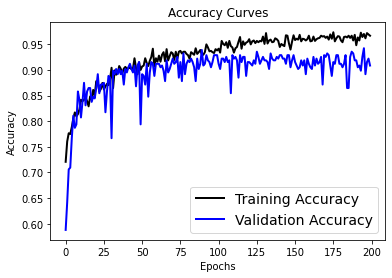

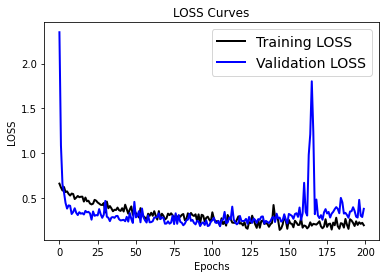

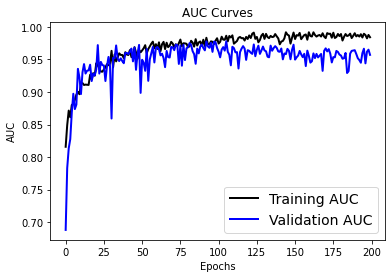

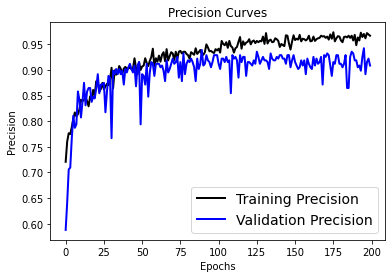

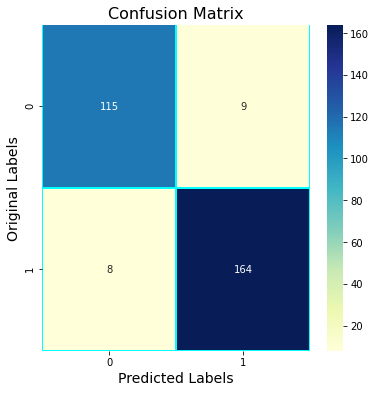

Last auc curve: 13
FOLD:  2
test accuracy:   accuracy: 88.18%
test F1 score:  89.79591836734694


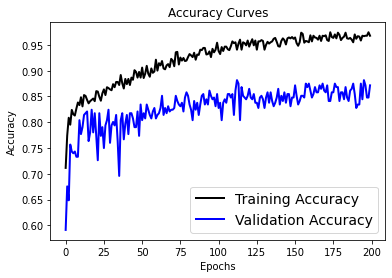

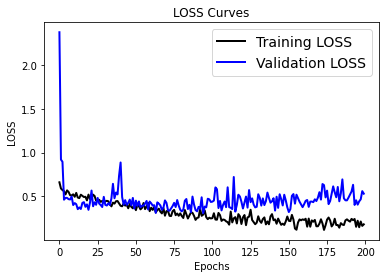

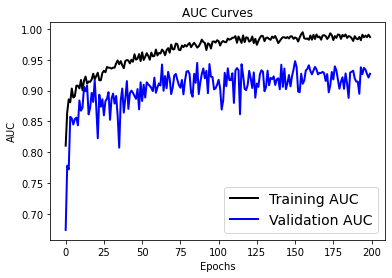

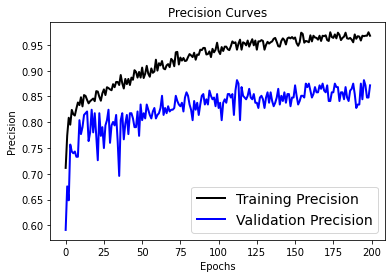

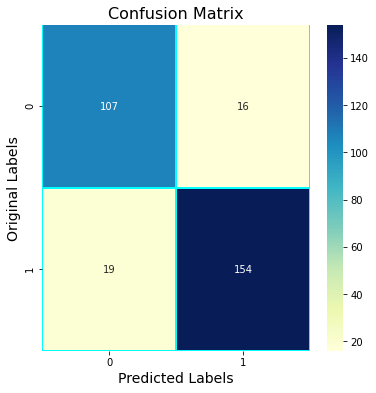

Last auc curve: 14
FOLD:  3
test accuracy:   accuracy: 92.91%
test F1 score:  93.69369369369369


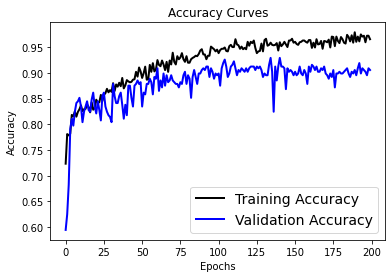

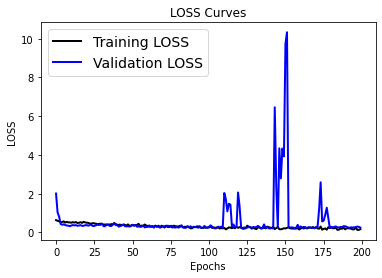

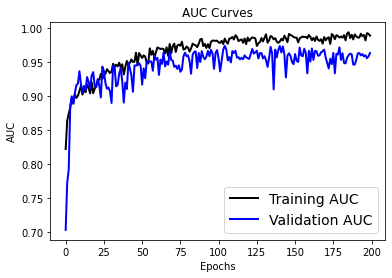

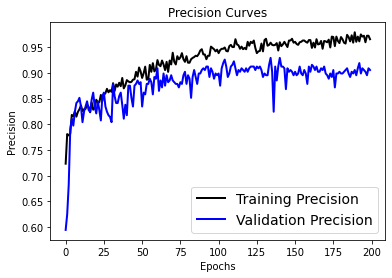

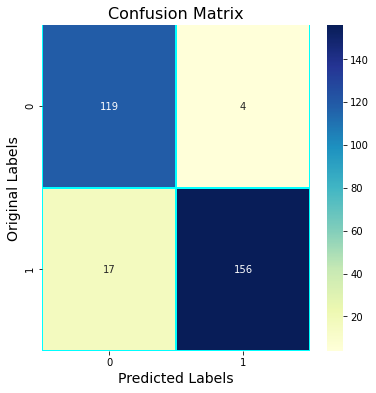

Last auc curve: 15
FOLD:  4
test accuracy:   accuracy: 87.46%
test F1 score:  89.02077151335313


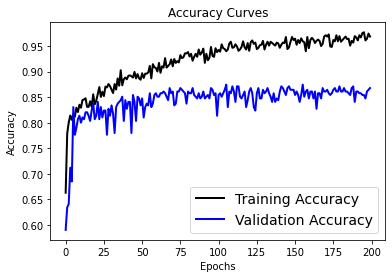

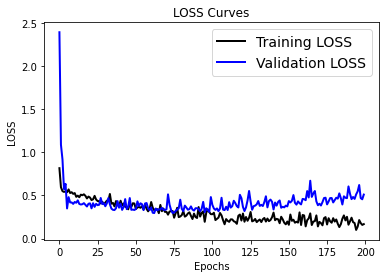

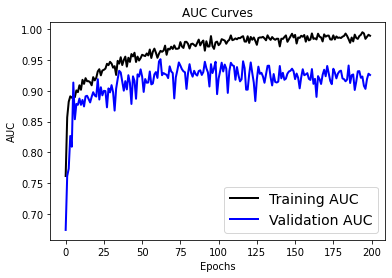

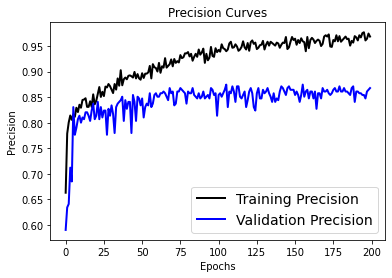

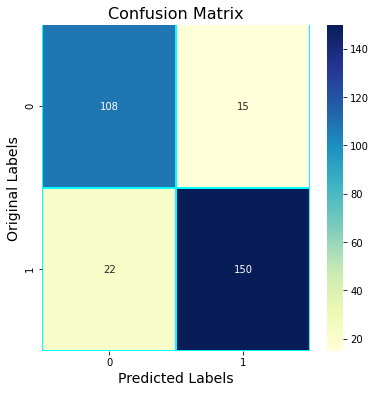

Last auc curve: 16
FOLD:  5
test accuracy:   accuracy: 89.83%
test F1 score:  91.12426035502959


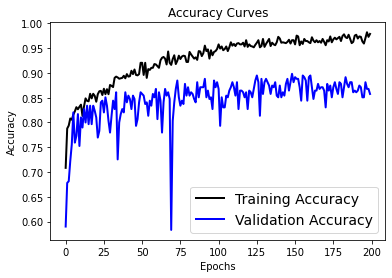

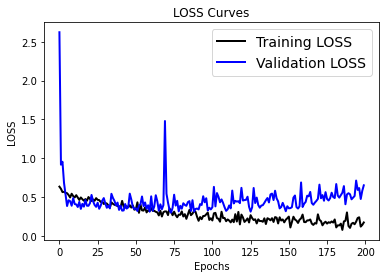

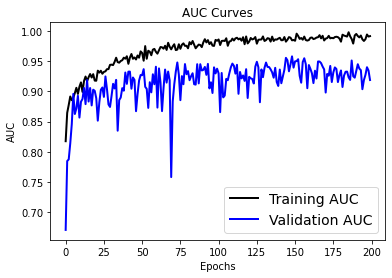

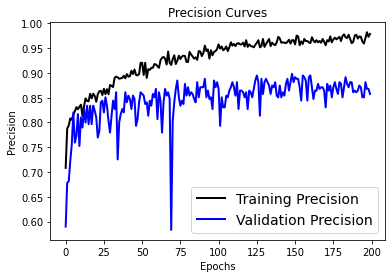

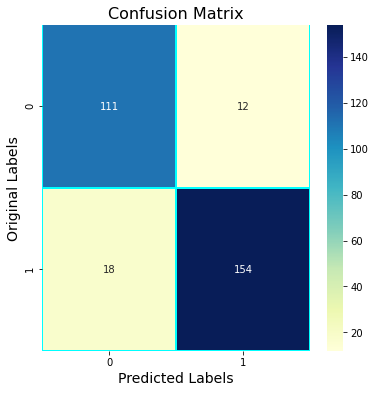

Last auc curve: 17



fold: 1 , test acc: 94.25675868988037 %
fold: 2 , test acc: 88.17567825317383 %
fold: 3 , test acc: 92.90540814399719 %
fold: 4 , test acc: 87.45762705802917 %
fold: 5 , test acc: 89.83050584793091 %



fold: 1 , test f1 score: 92.43697478991596 %
fold: 2 , test f1 score: 88.75739644970415 %
fold: 3 , test f1 score: 91.90751445086705 %
fold: 4 , test f1 score: 88.35820895522389 %
fold: 5 , test f1 score: 88.39779005524862 %
after  5  Cross validation test accuracy 90.53% (+/- 2.65%)
after  5  Cross validation test f1 score  89.97% (+/- 1.81%)


In [ ]:
CV(5)

### RMS - AdaDelta

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):
    ap = 30
    patience = 40
    n_fold=folds
    kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=7)
    cvscores = []
    C=1
    cvcf1= []
    for train, test in kfold.split(X, y):

        if C > 3:
          patience = 10
        print('FOLD: ', C)
        
        num_classes = np.unique(y).shape[0]
        model=inceptionShort_hrv(input_shape=(300, 12), dropout=0.7)
        #model.summary()
        # X_train, X_valid, y_train1, y_val = train_test_split(X[train], y[train], test_size=0.2, random_state=42)
        y_test=utils.to_categorical(y[test], num_classes)
        y_train=utils.to_categorical(y[train], num_classes)
        
        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()])
        mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Work/CV Models1/RMSADAPCA'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
        # es = EarlyStopping(monitor='val_loss', mode='min', patience=patience)
        history = model.fit((X[train], X_hrv[train]), y_train, epochs=170, batch_size=16, validation_data=((X[test], X_hrv[test]),y_test), class_weight={0:1, 1:2}, verbose=0, callbacks=[mc]) 

        left_epochs = 200 - len(history.history['accuracy'])

        opt1 = optimizers.Adadelta()
        model.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()])
        history1 = model.fit((X[train], X_hrv[train]), y_train, epochs=30, batch_size=16, validation_data=((X[test], X_hrv[test]),y_test), verbose=0)

        model1 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/RMSADAPCA'+str(C-1)+'.h5')
        scores = model1.evaluate((X[test], X_hrv[test]), y_test, verbose=0)
        print("test accuracy:   %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
        print("test F1 score: ",f1_score( y[test],np.argmax(model1.predict((X[test], X_hrv[test])), axis = 1))*100)
        plotting_epochs(history.history['accuracy'] + history1.history['accuracy'], history.history['val_accuracy'] + history1.history['val_accuracy'], 'Accuracy')
        plotting_epochs(history.history['loss'] + history1.history['loss'], history.history['val_loss'] + history1.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['auc_'+str(ap)] + history1.history['auc_'+str(ap+1)], history.history['val_auc_'+str(ap)] + history1.history['val_auc_'+str(ap+1)], 'AUC')
        plotting_epochs(history.history['precision_'+str(ap)] + history1.history['precision_'+str(ap+1)], history.history['val_precision_'+str(ap)] + history1.history['val_precision_'+str(ap+1)], 'Precision')
        predictions = model1.predict((X[test], X_hrv[test]))
        y_pred = np.argmax(predictions, axis = 1)
        heatMap(y[test], y_pred, (6,6))
        cvcf1.append(f1_score( y[test],np.argmax(model1.predict((X[test], X_hrv[test])), axis = 1))*100)
        cvscores.append(scores[1] * 100)
        ap+=2
        C+=1
        print("Last AUC curve", ap)
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test acc:",cvscores[i],"%")
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test f1 score:",cvcf1[i],"%")
    
    print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))

In [ ]:
CV(5)

FOLD:  1


## PCA + HRV Models

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras import optimizers
import numpy

def CV(folds):
    
    n_fold=folds
    kfold = StratifiedKFold(n_splits=n_fold, random_state=13)
    cvscores = []
    ap = 4
    C=1
    cvcf1= []
    for train, test in kfold.split(X, y):
        print('FOLD: ', C)
        C+=1
        num_classes = np.unique(y).shape[0]
        model=inceptionShort_hrv(input_shape=(300, 12), dropout=0.7, hrv_feature_count=16)
        #model.summary()
        # X_train, X_valid, y_train1, y_val = train_test_split(X[train], y[train], test_size=0.2, random_state=42)
        y_test=utils.to_categorical(y[test], num_classes)
        y_train=utils.to_categorical(y[train], num_classes)
        
        opt = optimizers.RMSprop(momentum=0.9)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()])
        mc = ModelCheckpoint('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRV'+str(C-1)+'.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

        history = model.fit((X[train], X_hrv[train]), y_train, epochs=200, batch_size=16, validation_data=((X[test], X_hrv[test]),y_test), class_weight={0:1, 1:2}, verbose=0, callbacks=[mc]) 
        model1 = load_model('/content/drive/MyDrive/Capstone_Work/CV Models1/PCAHRV'+str(C-1)+'.h5')
        scores = model1.evaluate((X[test], X_hrv[test]), y_test, verbose=0)
        print("test accuracy:   %s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
        print("test F1 score: ",f1_score( y[test],np.argmax(model1.predict((X[test], X_hrv[test])), axis = 1))*100)
        plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], 'Accuracy')
        plotting_epochs(history.history['loss'], history.history['val_loss'], 'LOSS')
        plotting_epochs(history.history['auc_'+str(ap)], history.history['val_auc_'+str(ap)], 'AUC')
        plotting_epochs(history.history['precision_'+str(ap)], history.history['val_precision_'+str(ap)], 'Precision')
        predictions = model1.predict((X[test], X_hrv[test]))
        y_pred = np.argmax(predictions, axis = 1)
        heatMap(y[test], y_pred, (6,6))
        cvcf1.append(f1_score( y[test],np.argmax(model.predict((X[test], X_hrv[test])), axis = 1))*100)
        cvscores.append(scores[1] * 100)
        # predictions = model.predict((X[test], X_hrv[test]))
        # y_pred = np.argmax(predictions, axis = 1)
        # heatMap(y[test], y_pred, (6,6))
        ap += 1
        print("Last auc curve:", ap)
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test acc:",cvscores[i],"%")
    print('\n\n')
    for i in range(0, n_fold):
        print('fold:',i+1,", test f1 score:",cvcf1[i],"%")
    
    print("after ",n_fold," Cross validation test accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
    print("after ",n_fold," Cross validation test f1 score  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvcf1), numpy.std(cvcf1)))
    last_auc_done = ap

FOLD:  1
test accuracy:   accuracy: 93.24%
test F1 score:  94.0828402366864


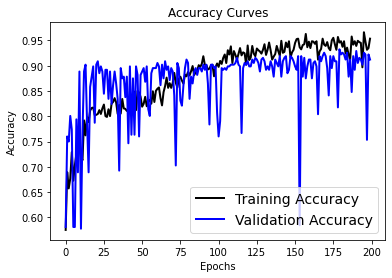

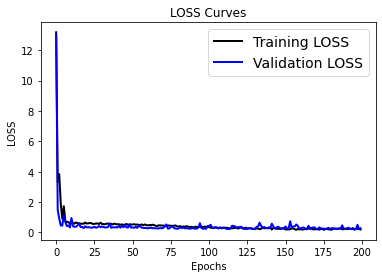

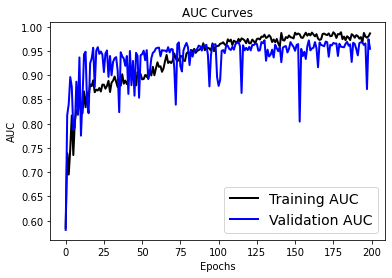

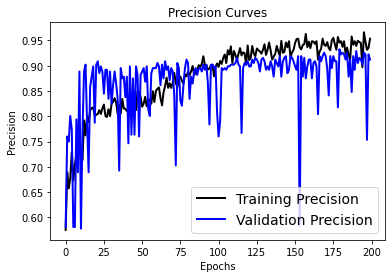

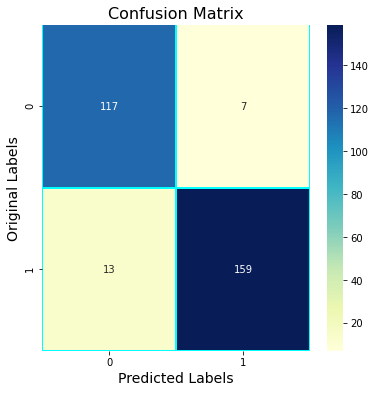

Last auc curve: 5
FOLD:  2
test accuracy:   accuracy: 88.18%
test F1 score:  89.36170212765957


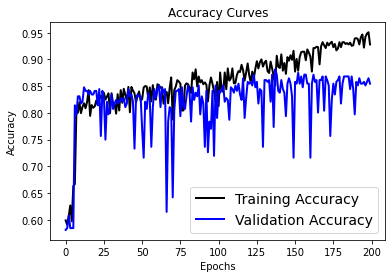

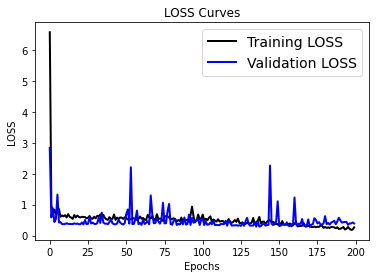

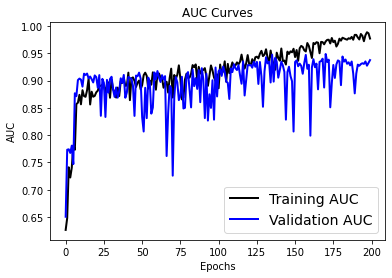

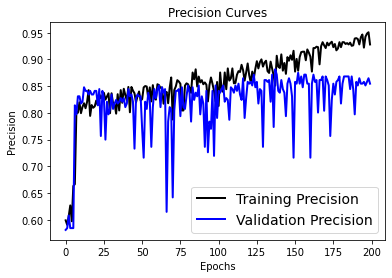

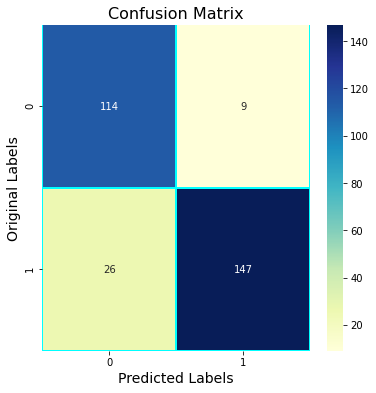

Last auc curve: 6
FOLD:  3
test accuracy:   accuracy: 92.23%
test F1 score:  93.17507418397626


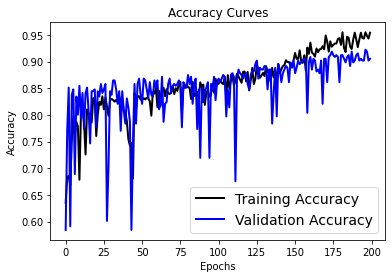

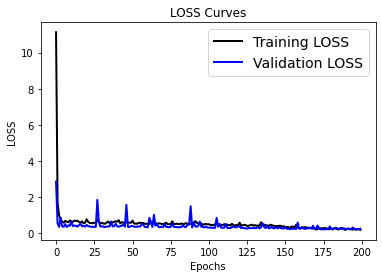

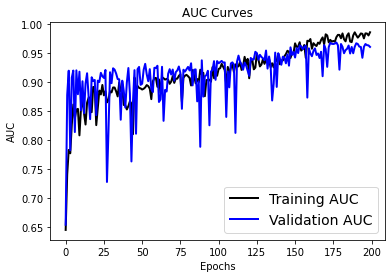

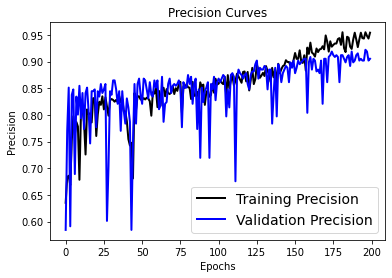

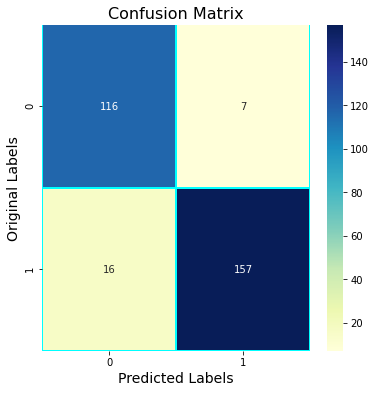

Last auc curve: 7
FOLD:  4
test accuracy:   accuracy: 89.49%
test F1 score:  90.40247678018576


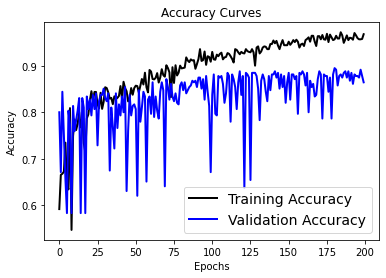

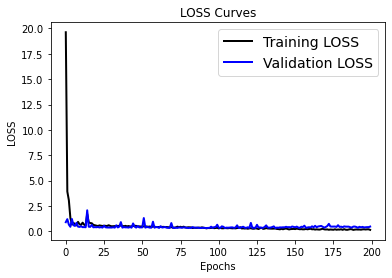

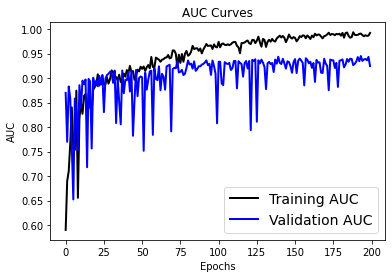

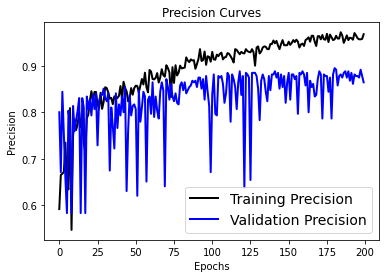

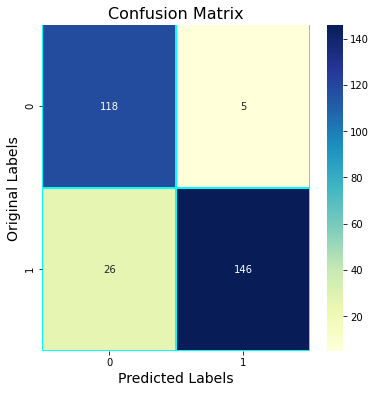

Last auc curve: 8
FOLD:  5
test accuracy:   accuracy: 88.47%
test F1 score:  89.50617283950618


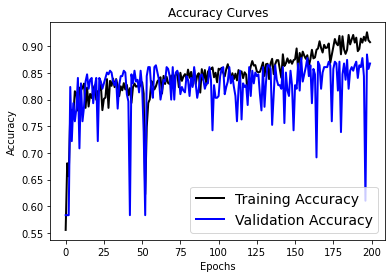

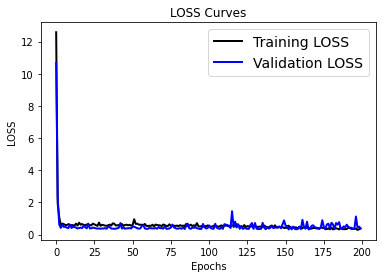

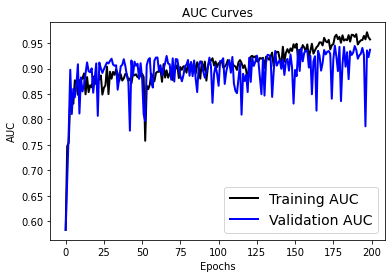

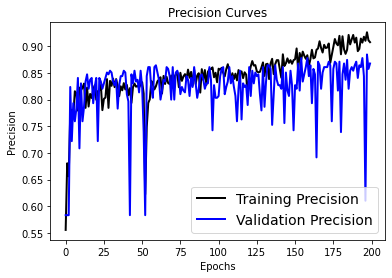

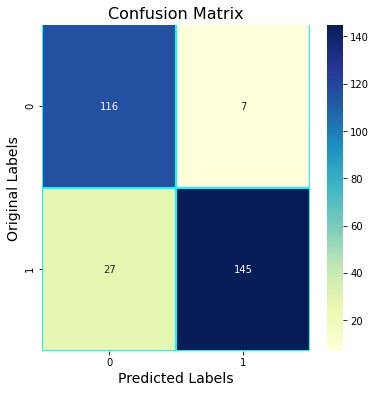

Last auc curve: 9



fold: 1 , test acc: 93.24324131011963 %
fold: 2 , test acc: 88.17567825317383 %
fold: 3 , test acc: 92.22972989082336 %
fold: 4 , test acc: 89.49152827262878 %
fold: 5 , test acc: 88.47457766532898 %



fold: 1 , test f1 score: 91.92546583850931 %
fold: 2 , test f1 score: 86.85015290519877 %
fold: 3 , test f1 score: 91.41104294478527 %
fold: 4 , test f1 score: 87.34177215189874 %
fold: 5 , test f1 score: 88.69565217391305 %
after  5  Cross validation test accuracy 90.32% (+/- 2.04%)
after  5  Cross validation test f1 score  89.24% (+/- 2.08%)


In [ ]:
CV(5)